In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [8]:
exp10_df = pd.read_csv('./csv/exp10.csv', sep=',')

In [10]:
exp10_cut_df = exp10_df.dropna()

In [11]:
exp10_cut_df = exp10_cut_df[exp10_cut_df['reference_M_Pa']>0]

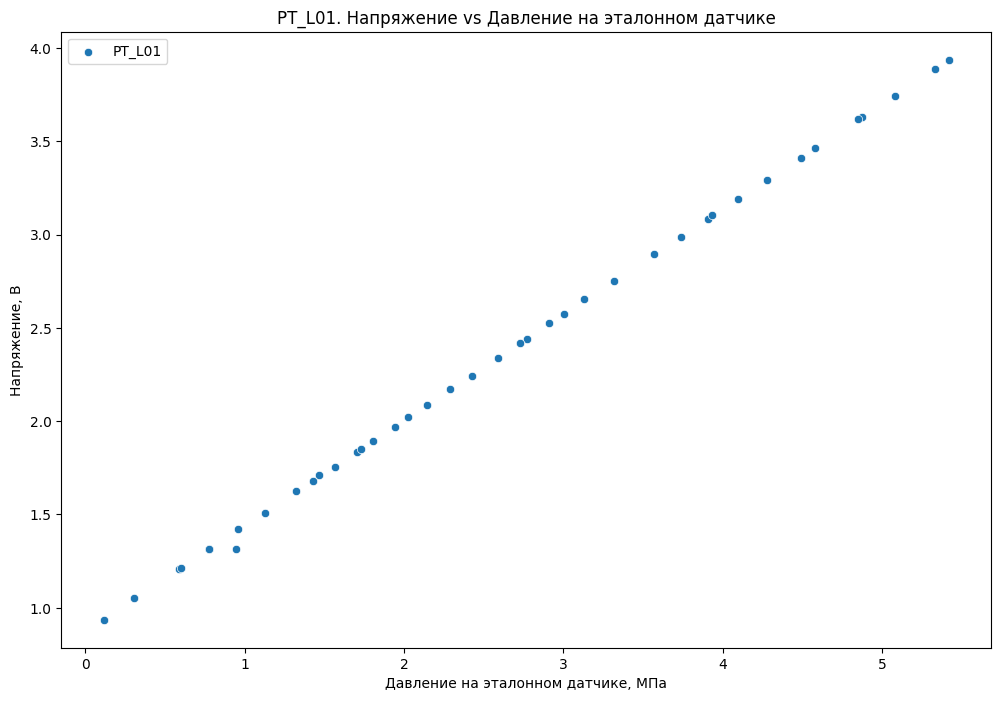

In [41]:
# Построение графиков
plt.figure(figsize=(12, 8))
sns.scatterplot(data=exp10_cut_df, x='reference_M_Pa', y='PT_L01_V', label='PT_L01')
plt.xlabel('Давление на эталонном датчике, МПа')
plt.ylabel('Напряжение, В')
plt.title('PT_L01. Напряжение vs Давление на эталонном датчике')
plt.legend()
plt.savefig(f'./results/fig/exp_data_PT_L01.png')
plt.show()

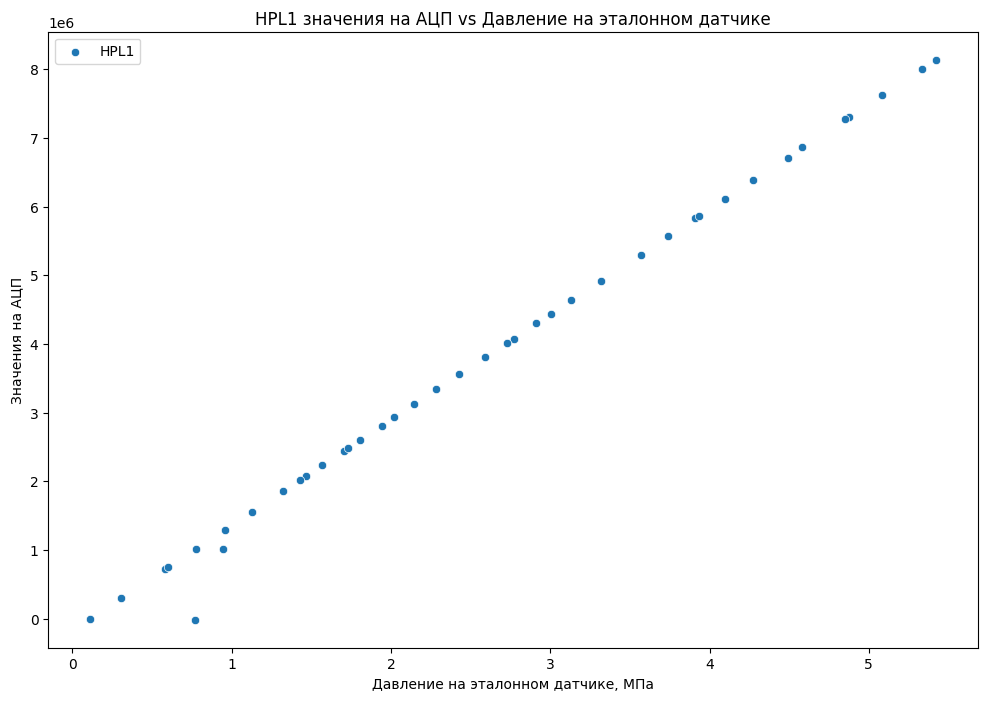

In [42]:
# Построение графиков
plt.figure(figsize=(12, 8))
sns.scatterplot(data=exp10_cut_df, x='reference_M_Pa', y='HPL1_parr', label='HPL1')
plt.xlabel('Давление на эталонном датчике, МПа')
plt.ylabel('Значения на АЦП')
plt.title('HPL1 значения на АЦП vs Давление на эталонном датчике')
plt.legend()
plt.savefig(f'./results/fig/exp_data_HPL1.png')
plt.show()

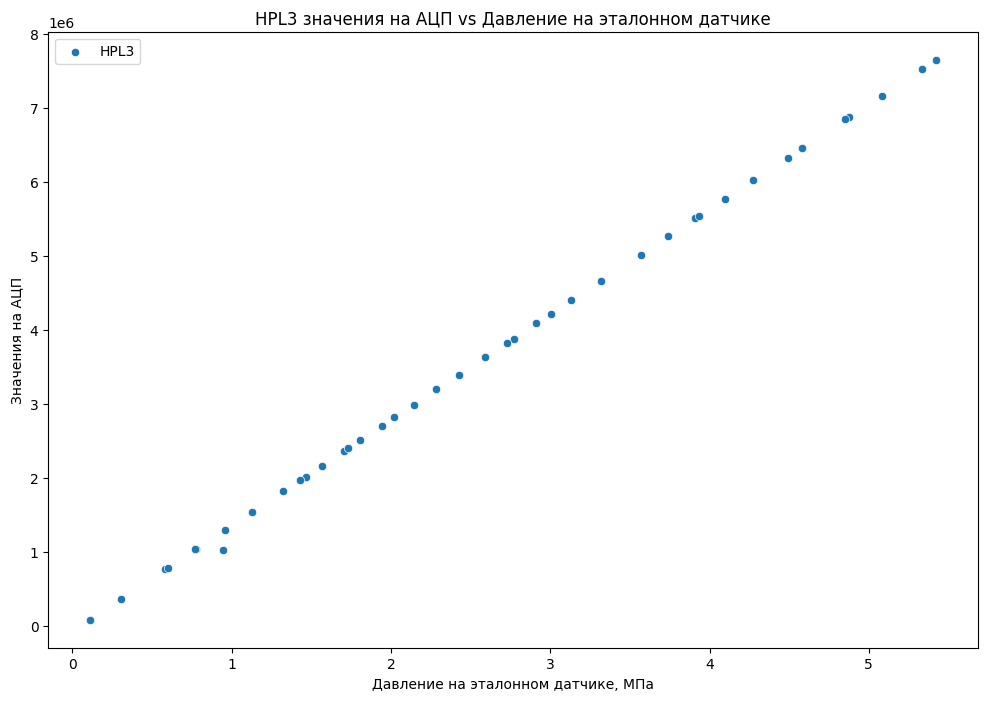

In [43]:
# Построение графиков
plt.figure(figsize=(12, 8))
sns.scatterplot(data=exp10_cut_df, x='reference_M_Pa', y='HPL3_parr', label='HPL3')
plt.xlabel('Давление на эталонном датчике, МПа')
plt.ylabel('Значения на АЦП')
plt.title('HPL3 значения на АЦП vs Давление на эталонном датчике')
plt.legend()
plt.savefig(f'./results/fig/exp_data_HPL3.png')
plt.show()

In [48]:
def plot_regression_with_error(sensor, sensor_name, threshold, x_labl):
    
    # Подготовка данных для регрессии
    x = exp10_cut_df[[sensor]].values.reshape(-1, 1)
    y = exp10_cut_df['reference_M_Pa'].values

    # Создание и обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(x, y)

    # Предсказанные значения
    y_pred = model.predict(x)

    # Вычисление остатков
    residuals = y - y_pred

    # Фильтрация выбросов на основе остатков
    filtered_df = exp10_cut_df[np.abs(residuals) <= threshold]
    
    # Повторное обучение модели на очищенных данных
    X_filtered = filtered_df[[sensor]].values.reshape(-1, 1)
    y_filtered = filtered_df['reference_M_Pa'].values
    
    model_filtered = LinearRegression()
    model_filtered.fit(X_filtered, y_filtered)

    # Получение коэффициентов регрессии
    coef = model_filtered.coef_[0]
    intercept = model_filtered.intercept_

    # Предсказанные значения
    y_pred = model_filtered.predict(x)

    # Вычисление коэффициента детерминации R^2 и средней квадратичной ошибки
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    # Вычисление средней относительной ошибки
    relative_errors = np.abs((y - y_pred) / y) * 100
    mean_relative_error = np.mean(relative_errors)

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Данные измерений')
    plt.plot(x, y_pred, color='red', label=f'Линия регрессии: y = {coef:.4f}x + {intercept:.4f}')
    plt.xlabel(x_labl)
    plt.ylabel('Давление на эталонном датчике, МПа')
    plt.title(f'Линия регрессии. {sensor_name}\n$R^2 = {r2:.4f}$, MSE = {mse:.4f}, MRE = {mean_relative_error:.2f}%')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'./results/fig/regression_{sensor_name}.png')
    plt.show()
    print(f'{sensor_name} y = {coef}x + {intercept}')

    # Построение графика остатков
    residuals = y - y_pred
    plt.figure(figsize=(10, 4))
    plt.scatter(x, residuals, color='purple')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel(x_labl)
    plt.ylabel('Остатки, МПа')
    plt.title(f'График остатков. {sensor_name}')
    plt.grid(True)
    plt.savefig(f'./results/fig/residuals_{sensor_name}.png')
    plt.show()


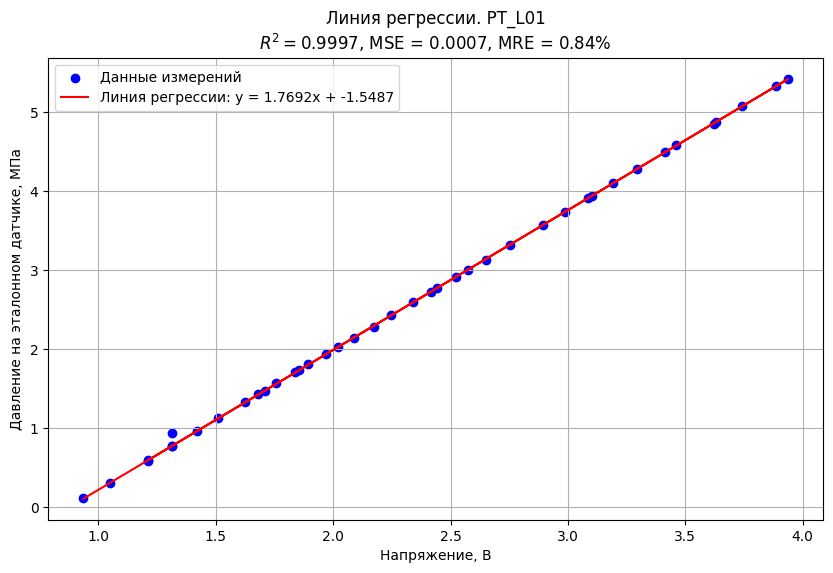

PT_L01 y = 1.7691630572615578x + -1.5487136262672774


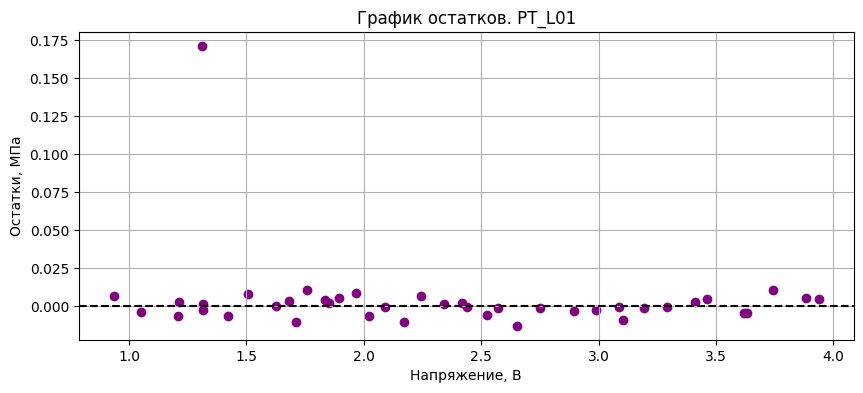

In [49]:
# Построение графиков для каждого датчика
plot_regression_with_error('PT_L01_V', 'PT_L01', 0.1, 'Напряжение, В')

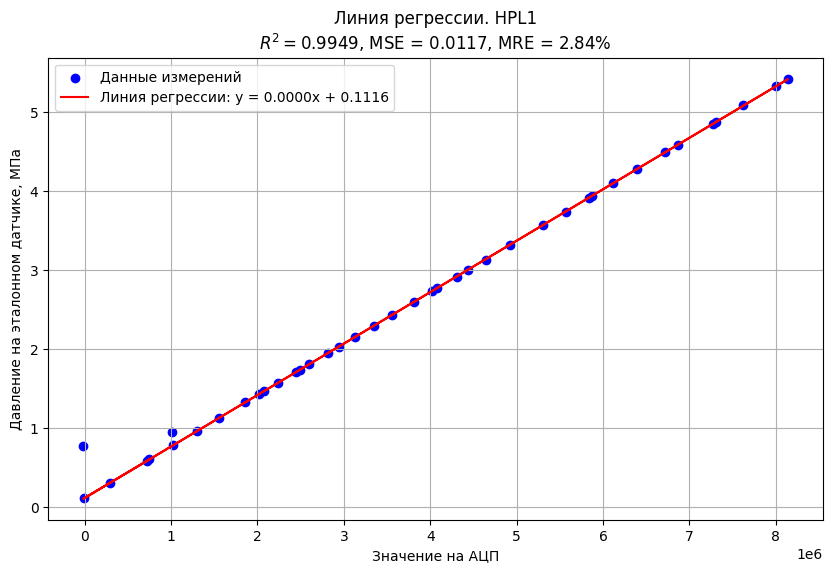

HPL1 y = 6.515211840664956e-07x + 0.11162470662985191


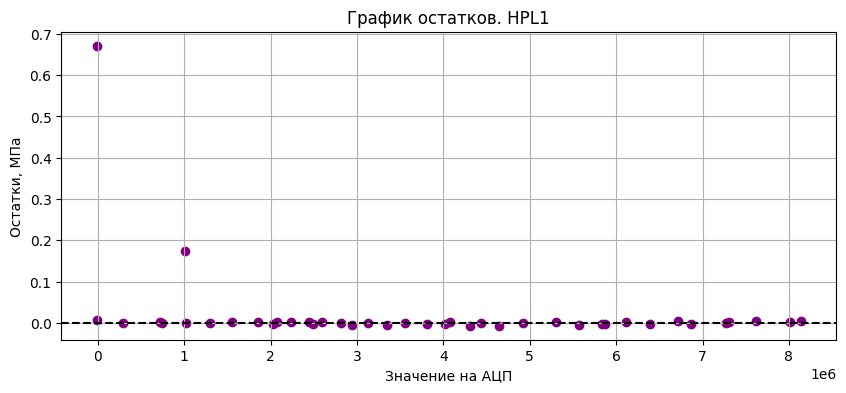

In [50]:
# Построение графиков для каждого датчика
plot_regression_with_error('HPL1_parr', 'HPL1', 0.1, 'Значение на АЦП')

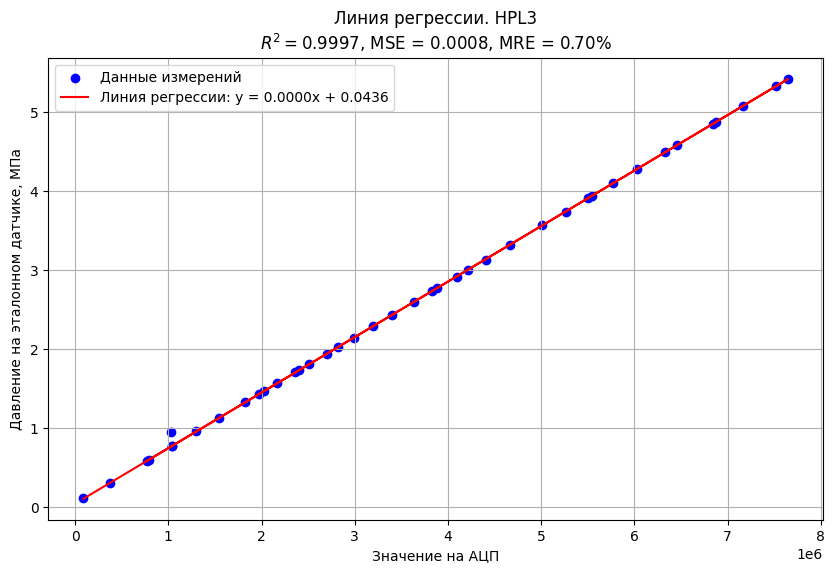

HPL3 y = 7.024890363226986e-07x + 0.04360515775870688


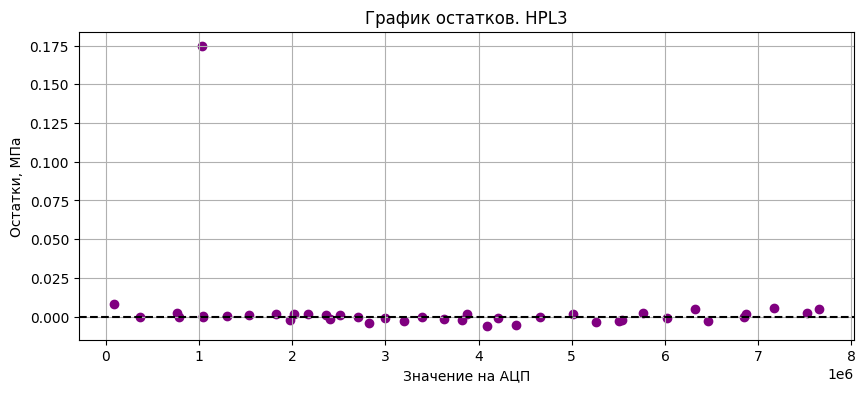

In [51]:
# Построение графиков для каждого датчика
plot_regression_with_error('HPL3_parr', 'HPL3', 0.1, 'Значение на АЦП')